In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
file_nino34='/scratch/kpegion/nino34_1982-2019.oisstv2_anoms.nc'
ds_nino34=xr.open_dataset(file_nino34)
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

In [3]:
file='/shared/obs/sw/era40/e4moda.an.sfc.t85.swvl1.1957-2002.nc'
ds_soil=xr.open_dataset(file)
ds_soil=ds_soil['SWVL1']*100
ds_soil

<xarray.DataArray 'SWVL1' (time: 540, lat: 128, lon: 256)>
array([[[25.144196, 25.144196, 25.144196, ..., 25.144958, 25.144958,
         25.144958],
        [25.141907, 25.141907, 25.141907, ..., 25.143433, 25.143433,
         25.14267 ],
        [25.135803, 25.134277, 25.131989, ..., 25.141907, 25.14038 ,
         25.138092],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]],

       [[25.144196, 25.144196, 25.144196, ..., 25.144958, 25.144958,
         25.144958],
        [25.141907, 25.141907, 25.141907, ..., 25.143433, 25.143433,
         25.14267 ],
        [25.135803, 25.134277, 25.131989, ..., 25.141907, 25.14038 ,
         25.138092],
...
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]],

       [[25.31128 , 25.309753, 25.308228, ..., 25.313568, 25.312805,
         25.312042],
        [25.254059, 25.251007, 25.247955, ..., 25.263214, 25.260162,
         25.25711 ],
        [25.254059, 25.249481, 25.244904, ..., 25.267792, 25.263214,
         25.258636],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1957-09-01 1957-10-01 ... 2002-08-01
  * lat      (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float32 0.0 1.406 2.812 4.218 ... 354.3 355.7 357.1 358.5

In [4]:
# Slice time to match Nino34 data for soil
ds_soil=ds_soil.sel(time=slice(ds_nino34['time'][0],ds_soil['time'][-1]))

# Slice time to match Nino34 data for Nino34
ds_nino34=ds_nino34.sel(time=slice(ds_nino34['time'][0],ds_soil['time'][-1]))

# Make anomalies
ds_climo=ds_soil.groupby('time.month').mean()
ds_anoms=ds_soil.groupby('time.month')-ds_climo

ds_anoms
# ds_new=ds_anoms.sel(lat=slice(0,90),lon=slice(-180,-50))
# ds_new

<xarray.DataArray 'SWVL1' (time: 248, lat: 128, lon: 256)>
array([[[ 1.30081177e-02,  1.32617950e-02,  1.34410858e-02, ...,
          1.46045685e-02,  1.39122009e-02,  1.38072968e-02],
        [ 3.66935730e-02,  3.68041992e-02,  3.69472504e-02, ...,
          4.24346924e-02,  4.01821136e-02,  3.88011932e-02],
        [-3.62396240e-04,  9.42230225e-04,  2.94303894e-03, ...,
          3.74031067e-03,  2.07138062e-03,  5.09262085e-04],
        ...,
        [-1.18707254e-21, -1.18707254e-21, -1.18707254e-21, ...,
         -1.18707254e-21, -1.18707254e-21, -1.18707254e-21],
        [-1.18707254e-21, -1.18707254e-21, -1.18707254e-21, ...,
         -1.18707254e-21, -1.18707254e-21, -1.18707254e-21],
        [-1.18707254e-21, -1.18707254e-21, -1.18707254e-21, ...,
         -1.18707254e-21, -1.18707254e-21, -1.18707254e-21]],

       [[-5.01441956e-03, -4.79507446e-03, -4.72068787e-03, ...,
         -4.68444824e-03, -4.75883484e-03, -5.01441956e-03],
        [ 1.70745850e-02,  1.77650452e-02,  1.86367035e-02, ...,
          2.03094482e-02,  1.92909241e-02,  1.85298920e-02],
        [-1.09710693e-02, -9.15527344e-03, -7.33947754e-03, ...,
         -9.19342041e-03, -9.59014893e-03, -1.05724335e-02],
...
          6.53371629e-21,  6.53371629e-21,  6.53371629e-21],
        [ 6.53371629e-21,  6.53371629e-21,  6.53371629e-21, ...,
          6.53371629e-21,  6.53371629e-21,  6.53371629e-21],
        [ 6.53371629e-21,  6.53371629e-21,  6.53371629e-21, ...,
          6.53371629e-21,  6.53371629e-21,  6.53371629e-21]],

       [[ 9.54761505e-02,  9.48944092e-02,  9.42039490e-02, ...,
          9.58042145e-02,  9.58042145e-02,  9.55123901e-02],
        [ 6.37607574e-02,  6.21242523e-02,  6.06346130e-02, ...,
          6.67381287e-02,  6.55040741e-02,  6.46324158e-02],
        [ 7.22961426e-02,  6.93931580e-02,  6.65206909e-02, ...,
          7.64751434e-02,  7.49874115e-02,  7.37876892e-02],
        ...,
        [ 6.44472167e-21,  6.44472167e-21,  6.44472167e-21, ...,
          6.44472167e-21,  6.44472167e-21,  6.44472167e-21],
        [ 6.44472167e-21,  6.44472167e-21,  6.44472167e-21, ...,
          6.44472167e-21,  6.44472167e-21,  6.44472167e-21],
        [ 6.44472167e-21,  6.44472167e-21,  6.44472167e-21, ...,
          6.44472167e-21,  6.44472167e-21,  6.44472167e-21]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2002-08-01
  * lat      (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float32 0.0 1.406 2.812 4.218 ... 354.3 355.7 357.1 358.5
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8

In [5]:
r_map=xr.corr(ds_nino34['sst'],ds_anoms,dim='time')
r_map

<xarray.DataArray (lat: 128, lon: 256)>
array([[-0.07786136, -0.0776319 , -0.07987958, ..., -0.07940466,
        -0.07776486, -0.07843771],
       [-0.06167911, -0.05828561, -0.05776799, ..., -0.06640413,
        -0.06301894, -0.06134052],
       [-0.10658691, -0.09822544, -0.0919437 , ..., -0.1066808 ,
        -0.10556957, -0.10724022],
       ...,
       [ 0.03278813,  0.03278813,  0.03278813, ...,  0.03278813,
         0.03278813,  0.03278813],
       [ 0.03278813,  0.03278813,  0.03278813, ...,  0.03278813,
         0.03278813,  0.03278813],
       [ 0.03278813,  0.03278813,  0.03278813, ...,  0.03278813,
         0.03278813,  0.03278813]])
Coordinates:
  * lat      (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float32 0.0 1.406 2.812 4.218 ... 354.3 355.7 357.1 358.5

Text(0.5, 1.0, 'Correlation between Nino3.4 and Soil Moisture Layer 1 Anomalies')

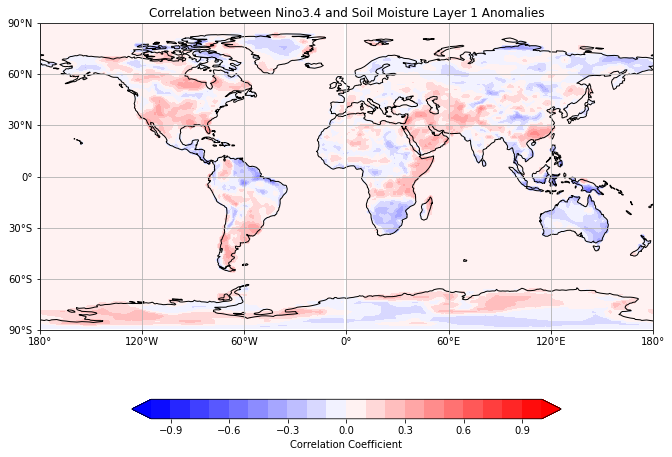

In [6]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point
data=r_map
# data,lon=add_cyclic_point(r_map,coord=ds_anoms['longitude'])

# Make a filled contour plot
cs=ax.contourf(ds_anoms['lon'],ds_anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')
# Add title
plt.title('Correlation between Nino3.4 and Soil Moisture Layer 1 Anomalies')

In [7]:
from scipy.stats import pearsonr

In [8]:
nx=len(ds_anoms['lon'])
ny=len(ds_anoms['lat'])

p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))

for i in range(nx):
    for j in range(ny):
        r,p=pearsonr(ds_nino34['sst'],ds_anoms[:,j,i])
        r_array[j,i]=r
        p_array[j,i]=p
r_array.shape

(128, 256)

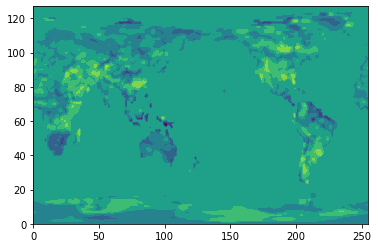

In [9]:
plt.contourf(r_array)

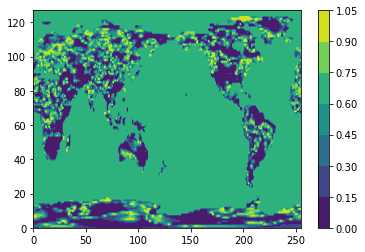

In [10]:
plt.contourf(p_array)
plt.colorbar()

In [11]:
mask_sig=np.where(p_array<0.05,r_array,np.nan)

Text(0.5, 1.0, 'Correlation between Nino3.4 and Soil Moisture Layer 1 Anomalies')

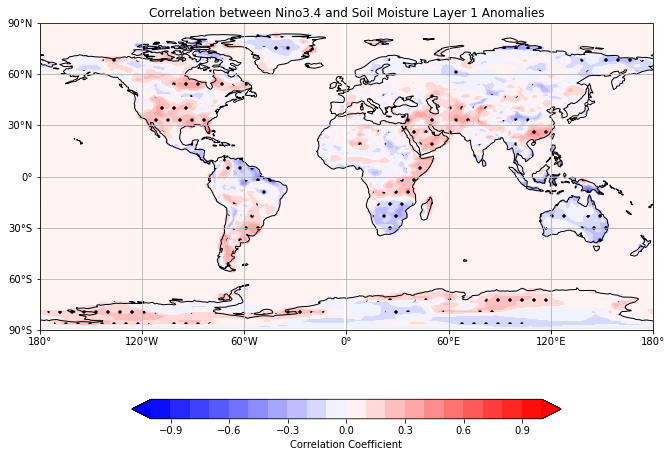

In [14]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point
data=r_array
# data,lon=add_cyclic_point(data,coord=ds_anoms['longitude'])
# mask_data,lons=add_cyclic_point(mask_sig,coord=ds_anoms['longitude'])

# Make a filled contour plot
cs=ax.contourf(ds_anoms['lon'],ds_anoms['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(ds_anoms['lon'],ds_anoms['lat'],mask_sig,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Nino3.4 and Soil Moisture Layer 1 Anomalies')